# VERİ BİLİMİ NEDİR? 
Veriden geçmişe, şimdiye ve geleceğe dair faydalı bilgilere ulaşmak için İSTATİSTİK,BİLGİSAYAR BİLİMİ ve BULUNDUĞU SEKTÖRÜN ÖZEL BİLGİSİnin ortak kullanılmasıyla oluşturulan işlemler sürecidir. 


![Image of Yaktocat](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTB2Cq8NP9KdO3UhS6YZNmqEtTUwSfbjTEpKDWwtAYQ6YG2CiXh)




# CRISP-DM 
İş zekası alanında (yani yönetimsel kadro) kullanılan süreç modelidir.


**1- İşin Anlaşılması**

**2- Verinin Anlaşılması**

**3- Verinin Hazırlanması**

**4- Modelleme**

**5- Değerlendirme**

**6- Konuşlandırma**




![Image of Yaktocat](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQjI_CQHIe0qIPhrMYJh3TMIMBFfJGOoZjDPMP7_hbtebTtIcGI)

# MAKİNE ÖĞRENMESİ NEDİR?
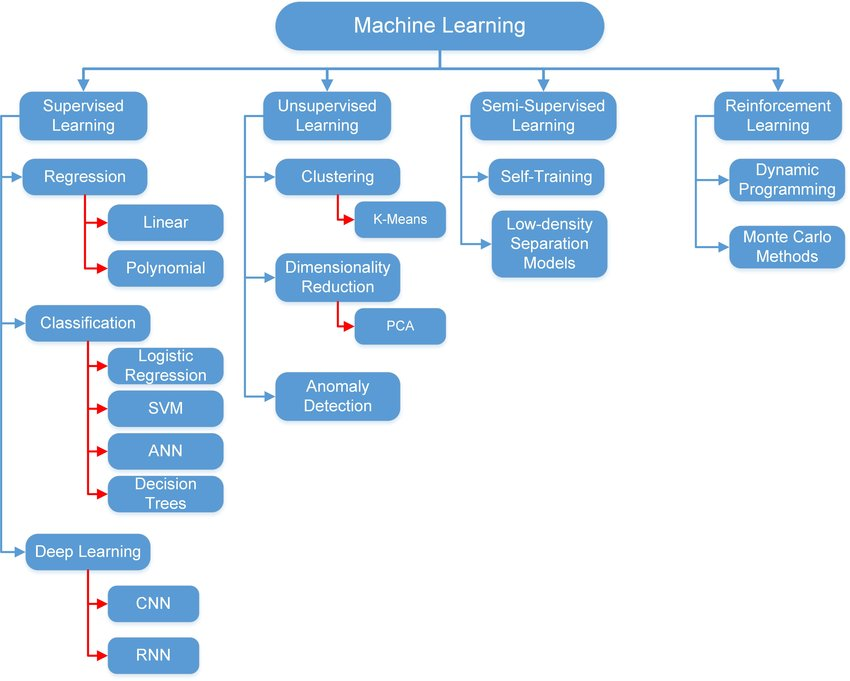


* 1) Gözetimli Öğrenme 
  
Etiketlenmiş yani bağımlı/bağımsız değişkenin belirli olduğu modeller kullanılır.

Y = f (X) modeline benzer yapıdadır.

Bu algoritmalar tahmin ve sınıflandırma problemlerinde kullanılır.

* 2) Gözetimsiz Öğrenme

Yalnızca girdi değişkeni bulunan bir çıktı alınmayan algoritmalar kümesidir.

Kümeleme,Birleştirme, PCA Problemleri için kullanılır.


* 3) Takviyeli Öğrenme

Makinenin çevre ile etkileşime geçerek en yüksek verimlilikte çalışmasını amaçlayan algoritmalardır.

Bir nevi deneme ve yanılma algoritmaları kullanılır.

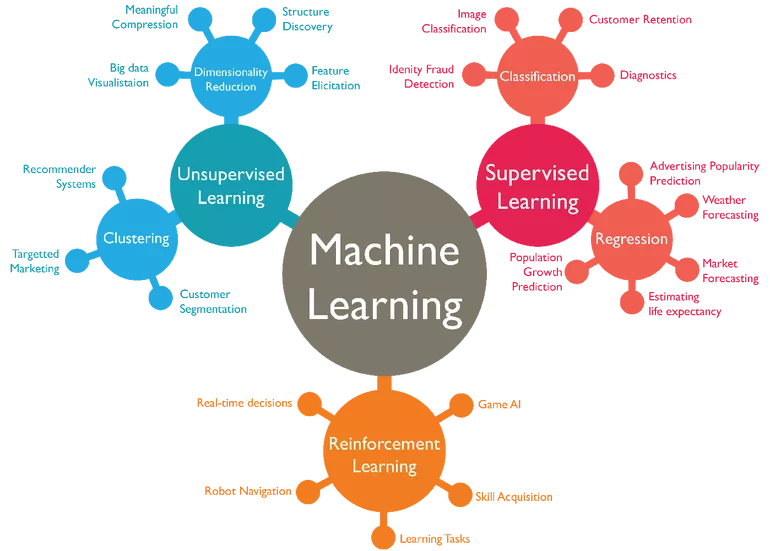

# MAKİNE ÖĞRENMESİ İŞİN NERESİNDE?
* MODELLEME AŞAMASINDA ÜRETİLEN MATEMATİKSEL İŞLEMLER

![Image of Yaktocat](https://miro.medium.com/max/1458/1*xMwqdbPMm3l_1cOVHAUYcQ.png)


# 1.1 BASİT LİNEER REGRESYON

![Image of Yaktocat](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQeZySTLtBdzmKmdQTrkyUrdwaiuruod5R8RanGcv-3j680Vpls)


https://scikit-learn.org/stable/modules/linear_model.html





## MODELİN UYGUNLUK TESTİ
**KULLANILAN YÖNTEMLER**

1)MSE(Hata Kareler Ortalaması R^2 )

2)Gradient Descent(Gradyan Alçalış)

3)Max Error

4)Median Absolute Error

Daha fazlası için;
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

   ##                                           KODLAMAYA BAŞLAYALIM
```
**Kurulması Gereken Modüller**
------------------------------------------
    # pip install numpy
    # pip install pandas
    # pip install -U scikit-learn
    # python -m pip install -U matplotlib
    # pip install statsmodels
------------------------------------------

```
PROBLEM: Reklamların Satışlara Etkisi

AMAÇ: Satış Sayısını EN iyi Şekilde Tahmin Edecek Modeli kurmak 

YÖNTEM: [ TV + RADYO + GAZETE ] bütçelerini bağımsız değişken olup satışları tahmin etmek

## 1.1.1 VERİYİ ANLAMAK

In [1]:
# Modul ekleme
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv")
df.head()


,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df['satıslar'] = df['TV'] + df['Newspaper'] + df['Radio']
print(df['satıslar'])

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
5      132.6
6      113.8
7      151.4
8       11.7
9      223.6
10      96.1
11     242.7
12     124.8
13     112.3
14     283.0
15     296.0
16     218.4
17     376.8
18     108.0
19     190.3
20     299.5
21     266.0
22      78.7
23     271.4
24      93.2
25     285.9
26     184.8
27     279.7
28     298.8
29     127.4
       ...  
170     80.0
171    232.8
172     56.7
173    188.3
174    238.9
175    367.6
176    298.9
177    213.2
178    302.7
179    193.2
180    167.5
181    251.3
182     91.6
183    402.4
184    305.1
185    269.7
186    168.2
187    238.0
188    303.6
189     54.2
190     86.4
191     92.3
192     52.9
193    212.4
194    191.3
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: satıslar, Length: 200, dtype: float64


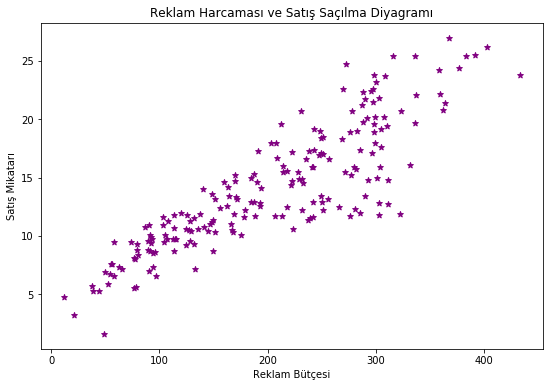

In [4]:
plt.figure(figsize=(9,6))

plt.scatter(df['satıslar'], df['Sales'], color='purple',marker='*')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")

plt.show()

## VERİ DAĞILIMLARI

In [5]:
X = df['satıslar'].values.reshape(-1,1)
Y = df['Sales'].values.reshape(-1,1)


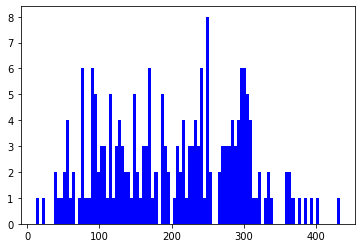

In [6]:
# X Dağılımı 

plt.hist(X,bins=100,facecolor='blue');

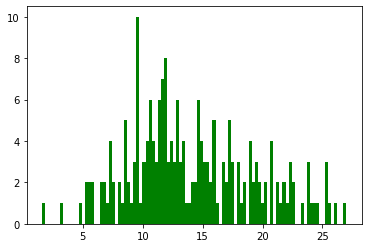

In [7]:
# Y Dağılımı
plt.hist(Y,bins=100,facecolor='green');

## 1.1.2 VERİNİN EĞİTİM VE TEST OLARAK BÖLÜNMESİ


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33 ,random_state = 0)

## 1.1.3 MODEL KURMA

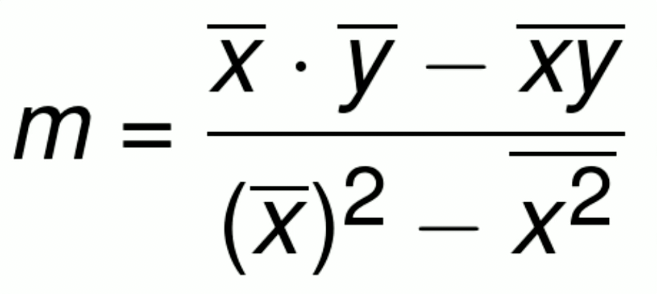

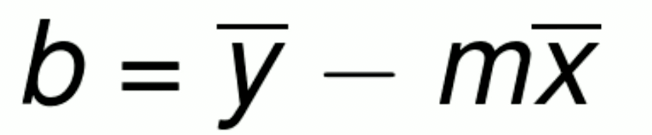

In [9]:
# SEKTÖRDE KULLANILMAYAN

def MATEMATİK_GÜCÜ(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean((xs * ys))) / (mean(xs)**2 - mean(xs**2))
    b = mean(ys) - (m * mean(xs))
    return m, b



In [10]:
# SEKTÖRDE KULLANILAN
# scipy / sklearn tercih edilebilir
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  # regressor adında bir nesneyi ürettik

In [11]:

regressor.fit(X_train,y_train) # fit (öğrnemek) fonksiyonu nesne üzerinden çağrıldı


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print("Katsayılar: ",regressor.coef_)
print("Sabit: ",regressor.intercept_)
print("Model parametreleri: ", regressor.get_params())

Katsayılar:  [[0.04811286]]
Sabit:  [4.49619351]
Model parametreleri:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


## 1.1.4 TAHMİNLEME

In [13]:
y_pred = regressor.predict(X_test)

print(y_pred)


[[ 9.69238188]
 [ 8.34522193]
 [ 9.97624773]
 [22.93303966]
 [14.75385426]
 [ 8.90333105]
 [10.87595812]
 [16.81789575]
 [10.50067785]
 [15.80752579]
 [21.75427471]
 [10.50548914]
 [12.55509677]
 [15.00404111]
 [10.52954556]
 [11.7804798 ]
 [18.25165884]
 [ 6.85372342]
 [12.66575634]
 [16.57733148]
 [23.85680648]
 [11.77085723]
 [15.51884866]
 [13.38263788]
 [ 8.19607208]
 [12.6801902 ]
 [13.79159715]
 [17.47223059]
 [16.13950449]
 [ 9.02361319]
 [15.00404111]
 [19.3293868 ]
 [20.45041633]
 [19.06957738]
 [ 8.28267522]
 [ 7.10391027]
 [10.01473801]
 [16.52440734]
 [11.64095252]
 [ 7.6572081 ]
 [11.28491739]
 [ 7.30117297]
 [13.38744917]
 [16.08658035]
 [18.76646639]
 [11.26567225]
 [ 5.05911391]
 [11.7131218 ]
 [16.12988192]
 [11.45812367]
 [11.99217637]
 [20.66211289]
 [19.17542566]
 [15.46111323]
 [ 8.87927463]
 [ 8.98031162]
 [22.02851798]
 [15.14356839]
 [16.83232961]
 [ 8.1912608 ]
 [19.46410279]
 [14.45555456]
 [16.58695405]
 [13.65206987]
 [16.46186062]
 [19.42080123]]


In [14]:
predictions = pd.DataFrame(data=y_pred,    
                index=range(len(y_pred)),    
                   columns=['TAHMİN DEĞERİ'])  

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['GERÇEK DEĞER'] = y_test
predictions.head(20)

,TAHMİN DEĞERİ,GERÇEK DEĞER
0,9.692382,11.3
1,8.345222,8.4
2,9.976248,8.7
3,22.933040,25.4
4,14.753854,11.7
5,8.903331,8.7
6,10.875958,7.2
7,16.817896,13.2
8,10.500678,9.2
9,15.807526,16.6


## 1.1.5 HATA ANALİZİ

In [15]:
from sklearn.metrics import r2_score
r2_hata=r2_score(y_test, y_pred)
print(r2_hata)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(mse)

0.7917216353175865
5.4104718470761055


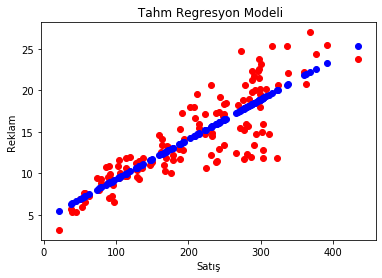

In [16]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title(' Tahm Regresyon Modeli')
plt.xlabel('Satış')
plt.ylabel('Reklam')
plt.show()

## 1.1.6 MODELİN GRAFİK HALİ

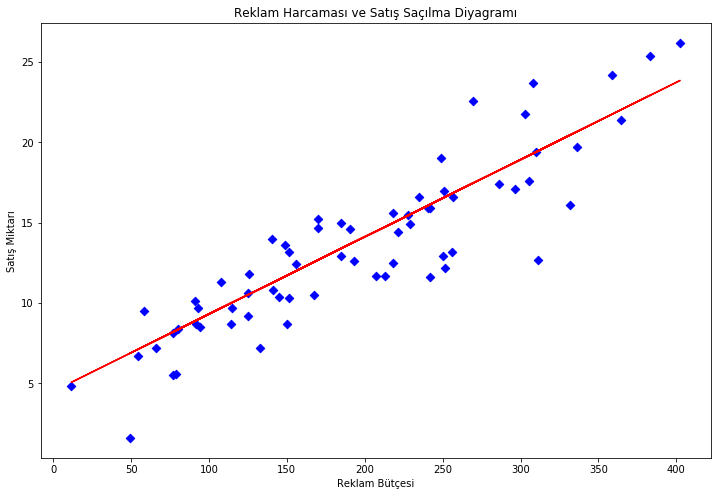

In [17]:

plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color='blue',marker='D')
plt.plot(X_test, y_pred, color='red')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Miktarı")
plt.show()

## 1.1.7 MODELİN ANLAMLILIĞI

In [18]:
import statsmodels.api as sm

In [19]:
X_train = sm.add_constant(X_train)# bias değeri eklemek


In [20]:
reg_OLS_model = sm.OLS(endog=y_train, exog=X_train).fit()

reg_OLS_model.summary()
# Tüm p değerleri < 0.05 olduğundan ve F istatistiğinin de p değeri < 0.05 olduğundan model anlamlıdır.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     358.7
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           1.87e-39
Time:                        23:27:05   Log-Likelihood:                -323.84
No. Observations:                 134   AIC:                             651.7
Df Residuals:                     132   BIC:                             657.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4962      0.570      7.883      0.000       3.368       5.624
x1             0.0481      0.003     18.939      0.000       0.043       0.053
==============================================================================
Omnibus:                        5.565   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.103
Skew:                          -0.402   Prob(JB):                       0.0779
Kurtosis:                       3.518   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.2 ÇOKLU DOĞRUSAL REGRESYON (Multiple Linear Regression)


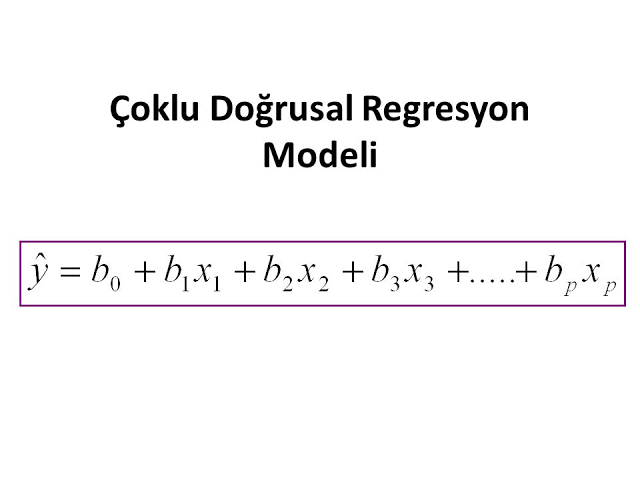

* PROBLEM: TV , RADYO ,GAZETE Reklamlarının Satışlara Etkisi

* AMAÇ: Satış Sayısını EN iyi Şekilde Tahmin Edecek Modeli kurmak 

* YÖNTEM:TV , RADYO , GAZETE bütçelerini ayrı ayrı bağımsız değişken alıp satışları tahmin etmek

## 1.2.1 VERİYİ ANLAMAK

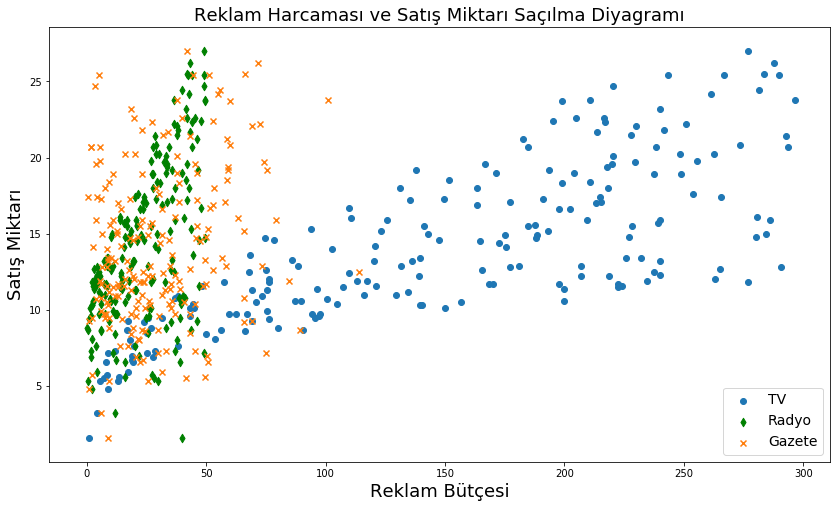

In [21]:
plt.figure(figsize=(14,8))
plt.scatter(df['TV'], df['Sales'],  label="TV")
plt.scatter(df['Radio'], df['Sales'],  label="Radyo",c='green',marker='d')
plt.scatter(df['Newspaper'], df['Sales'], marker='x', label="Gazete")

plt.legend(loc='lower right', fontsize=14)
plt.title("Reklam Harcaması ve Satış Miktarı Saçılma Diyagramı", fontsize=18)
plt.xlabel("Reklam Bütçesi", fontsize=18)
plt.ylabel("Satış Miktarı", fontsize=18)
plt.show()

Text(0.5, 0, 'GAZETE BÜTÇESİ')

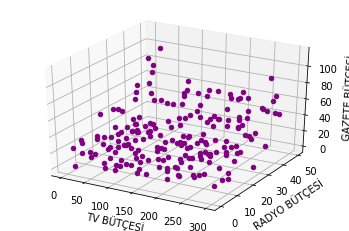

In [22]:
# Axes3D sadece 3D olarak veri kümemizi çizdirmek için
from mpl_toolkits.mplot3d import Axes3D
X_plot1 = df['TV']
X_plot2 = df['Radio']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for xs, ys, zs in zip(X_plot1, X_plot2, df['Newspaper']):
    ax.scatter(xs, ys, zs, c='purple')

ax.set_xlabel('TV BÜTÇESİ')
ax.set_ylabel('RADYO BÜTÇESİ')
ax.set_zlabel('GAZETE BÜTÇESİ')

## 1.2.2 VERİYİ BÖLME(DİKEY)

In [23]:
X = df.iloc[:,1:-2].values  # Bağımsız Değişken
y = df.iloc[:,4].values    #Bağımlı Değişken
print(X)
print(X.shape)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [24]:
print(y)
print(y.shape)

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  9.7 1

## 1.2.3 EĞİTİM VE TEST VERİSİ OLUŞTURMAK

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.33, random_state = 0)
print(y_test)
print(X_train.shape)

[11.3  8.4  8.7 25.4 11.7  8.7  7.2 13.2  9.2 16.6 24.2 10.6 10.5 15.6
 11.8 13.2 17.4  1.6 14.7 17.  26.2 10.3 14.9 12.9  8.1 15.2 12.6 22.6
 11.6  8.5 12.5 23.7 16.1 21.8  5.6  6.7  9.7 12.9 13.6  7.2 10.8  9.5
 15.  15.9 17.1 14.   4.8  8.7 15.9 10.4 12.4 19.7 17.6 15.5 10.1  9.7
 21.4 14.4 16.6  5.5 12.7 11.7 12.2 14.6 19.  19.4]
(134, 3)


## 1.2.4 MODEL KURMAK

In [26]:
# YENİDEN MODEL ÜRETTİK ÇÜNKÜ AZ ÖNCEKİ REGRESSOR NESNESİ EĞİTİLMİŞ BİR MODELDİ
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()


In [27]:
# EĞİTİM X_TRAİN --> Y_TRAİN
MLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.2.5 TAHMİN

In [28]:
y_pred_mlr = MLR.predict(X_test)
print(y_pred_mlr)

[10.05094829  7.45024493  7.03275278 24.20039113 12.07717347  6.59515104
 13.10163135 15.00806148 11.03411659 16.28366834 23.02906264  9.15880971
 10.38072907 15.40421336 11.59963519 12.11757433 18.61318934 10.74323152
 16.0487818  17.23688108 24.29938882  9.52224345 15.17453643 12.45240637
  5.72609176 15.19714126 12.25915605 20.91174918 13.34916217  9.18401362
 13.40715795 21.59349883 18.18058661 21.15271173  6.74645348  6.17396095
  8.01987622 13.19831262 14.77943142  6.25371161 12.30223133  9.14280566
 15.03364665 16.27567962 17.24668844 13.29909071  3.70096923 12.48102981
 15.94129555  8.75358577 10.66768954 19.62612371 18.42412795 15.28903916
 10.01266375  8.19193968 21.56883554 14.1921378  16.35036777  8.86157431
 15.34670348 12.36920583 13.72628782 14.18434042 18.40381878 19.29862422]


In [29]:

predictions = pd.DataFrame(data=y_pred_mlr,    
                index=range(len(y_pred_mlr)),    
                   columns=['TAHMİN'])  

predictions['GERÇEK'] = y_test
predictions.head(20)

,TAHMİN,GERÇEK
0,10.050948,11.3
1,7.450245,8.4
2,7.032753,8.7
3,24.200391,25.4
4,12.077173,11.7
5,6.595151,8.7
6,13.101631,7.2
7,15.008061,13.2
8,11.034117,9.2
9,16.283668,16.6


## 1.2.6 HATA ANALİZİ

In [30]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_mlr)
print(r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred_mlr)
print(mse)

0.8676476175663506
3.4381335773526716


# BONUS : YAPAY SİNİR AĞI İLE TAHMİNLEME

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised

* Standartlaştırma işlemi yapılmak zorundadır.

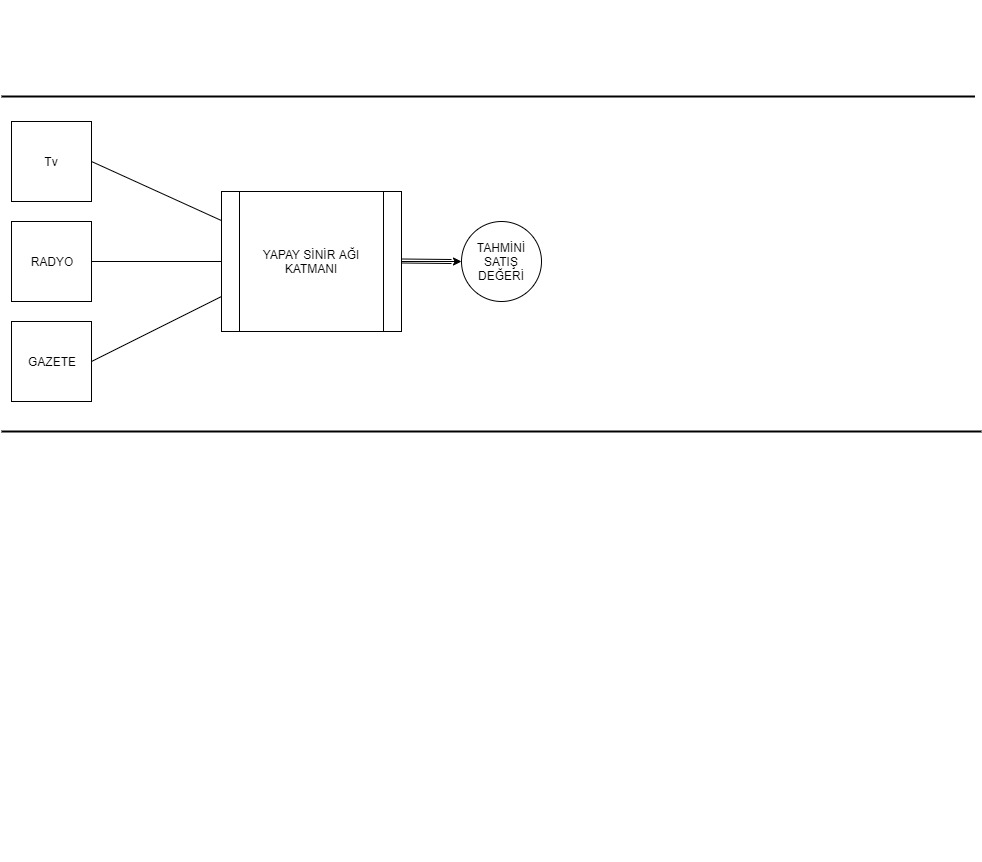

## YAPAY SİNİR AĞI 
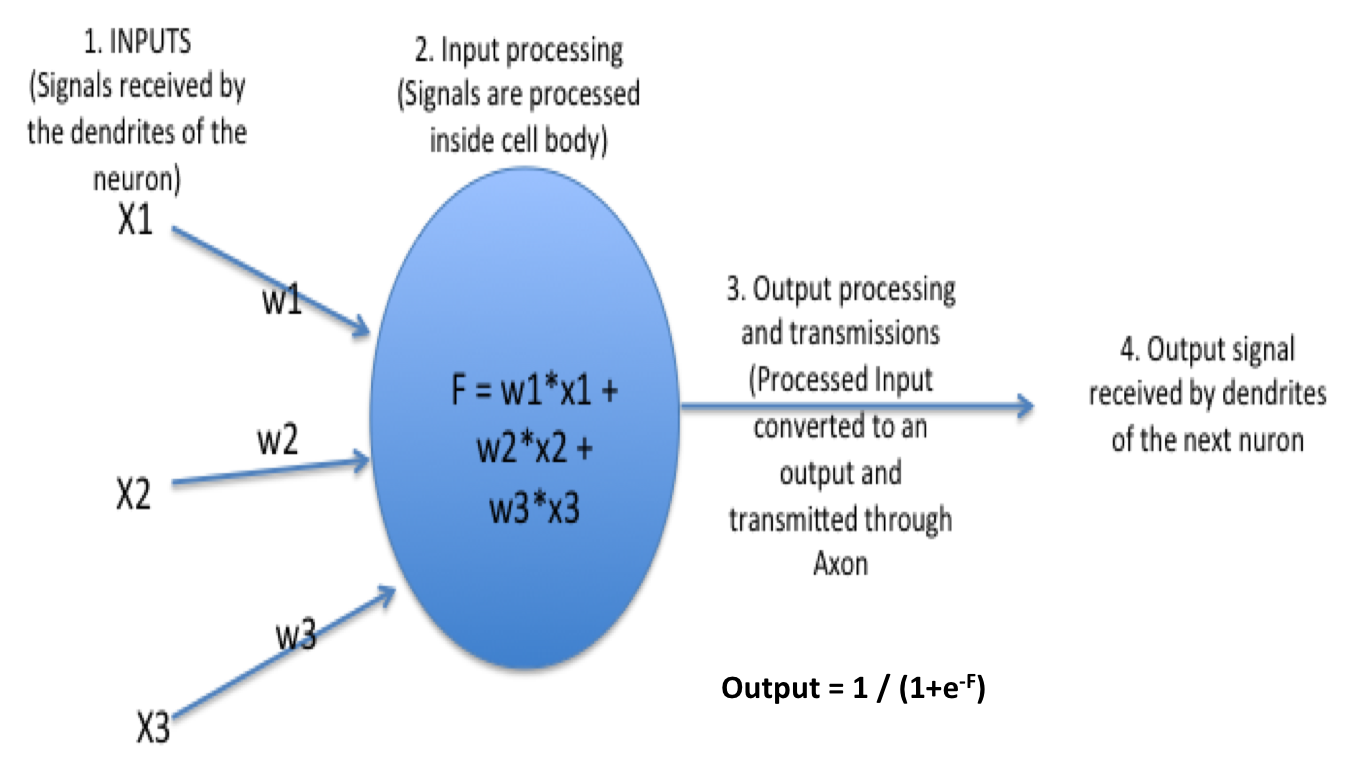

In [31]:
# STANDARTLAŞTIRMA

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## MODELLEME

In [32]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(    
    solver='lbfgs',
    hidden_layer_sizes=50,
    max_iter=10000,
    shuffle=False,
    random_state=9876,
    activation='relu')
# ÖĞRENME
mlp.fit(X_train,y_train)
# TAHMİN 
y_pred_mlp=mlp.predict(X_test)


In [33]:

predictions = pd.DataFrame(data=y_pred_mlp,    
                index=range(len(y_pred_mlp)),    
                   columns=['TAHMİN'])  

predictions['GERÇEK'] = y_test
predictions.head(20)

,TAHMİN,GERÇEK
0,11.486647,11.3
1,8.504288,8.4
2,9.430362,8.7
3,25.432305,25.4
4,12.001022,11.7
5,8.706790,8.7
6,9.516309,7.2
7,13.156673,13.2
8,8.451658,9.2
9,16.594948,16.6


In [34]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_mlp)
print(r2)



0.9740703723037836
